In [516]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

import warnings 
warnings.filterwarnings("ignore")

In [374]:
data = pd.read_csv(r"C:\Users\prito\OneDrive\Desktop\data.csv")

In [376]:
data.head()

,S,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [378]:
data.tail()

,S,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,12-09-2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,26-09-2015 01:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,07-11-2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,30-11-2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,01-02-2016 23:04,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [380]:
data.shape

(1259, 27)

In [382]:
data.rename(columns={'+': 'anonymity'}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S                          1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [384]:
# Remove specified columns if they exist
cols_to_drop = ['Country', 'state', 'S', 'comments']
existing_cols = [col for col in cols_to_drop if col in data.columns]
data.drop(columns=existing_cols, inplace=True)
print(f"Dropped columns: {existing_cols}")
print("Remaining columns:", data.columns.tolist())

Dropped columns: ['Country', 'state', 'S', 'comments']
Remaining columns: ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [386]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [388]:
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [390]:
data['self_employed'].fillna('No', inplace=True)

In [392]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [394]:
data['work_interfere'].fillna('N/A', inplace=True)

In [396]:
data.drop(data[(data['Age'] < 18) | (data['Age'] > 60)].index, inplace=True)

In [398]:
# Standardize gender values
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male', 'Man', 'cis male', 'Mail', 
                        'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'],'Male', inplace = True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'female', 'femail', 'Cis Female', 
                        'cis-female/femme', 'Femake', 'Female (cis)','woman'], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne', 
                        'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah', 
                        'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 
                        'p', 'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace = True)

In [400]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,Jun-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [402]:
X = data.drop('treatment', axis = 1)
y = data['treatment']

ct = ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history',
    'work_interfere','no_employees','remote_work','tech_company',
    'benefits','care_options','wellness_program','seek_help',
    'anonymity','leave','mental_health_consequence',
    'phys_health_consequence','coworkers','supervisor',
    'mental_health_interview','phys_health_interview',
    'mental_vs_physical','obs_consequence'])],remainder='passthrough')

X = ct.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(y)

In [406]:
joblib.dump(ct,'feature_values')

['feature_values']

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

In [482]:
model_dict = {}
model_dict['Logistic regression'] = LogisticRegression(solver='liblinear', random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree classifier'] = DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=51)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier(random_state=49)

In [484]:
def model_test(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('{}==============================================='.format(model_name))
    print('Score is : {}'.format(accuracy))
    print()

In [486]:
for model_name, model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)

Logistic regression===============================================
Score is : 0.848

KNN Classifier===============================================
Score is : 0.7813333333333333

Decision Tree classifier===============================================
Score is : 0.7946666666666666

Random Forest Classifier===============================================
Score is : 0.8533333333333334

AdaBoost Classifier===============================================
Score is : 0.864

Gradient Boosting Classifier===============================================
Score is : 0.84

XGB Classifier===============================================
Score is : 0.84



In [488]:
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train, y_train)
pred_abc = abc.predict(X_test)
print('Accuracy of AdaBoost=', accuracy_score(y_test, pred_abc))

Accuracy of AdaBoost= 0.864


In [498]:
params_abc = {
    'n_estimators': [int(x) for x in np.linspace(start=1, stop=50, num=15)],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]}

# Set up RandomizedSearchCV
abc_random = RandomizedSearchCV(random_state=49, estimator=abc, param_distributions=params_abc,
    n_iter=50, cv=5, n_jobs=-1)

params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [500]:
abc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=49),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [502]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.02}

In [504]:
# Train AdaBoost with best parameters
abc_tuned = AdaBoostClassifier(
    random_state=49,
    n_estimators=abc_random.best_params_['n_estimators'],
    learning_rate=abc_random.best_params_['learning_rate']
)
abc_tuned.fit(X_train, y_train)
pred_abc_tuned = abc_tuned.predict(X_test)
print('Accuracy of AdaBoost(tuned)=', accuracy_score(y_test, pred_abc_tuned))

Accuracy of AdaBoost(tuned)= 0.8693333333333333


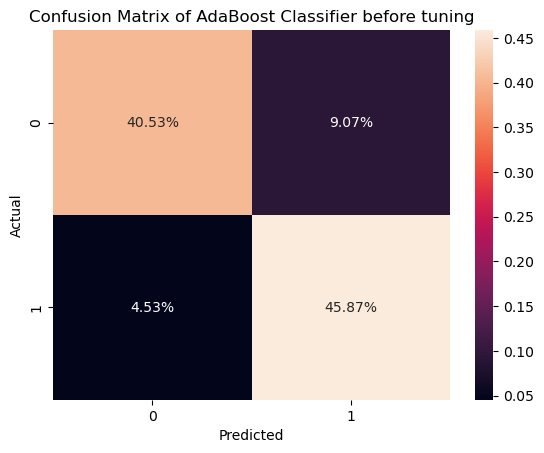

In [512]:
cf_matrix = confusion_matrix(y_test, pred_abc)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier before tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

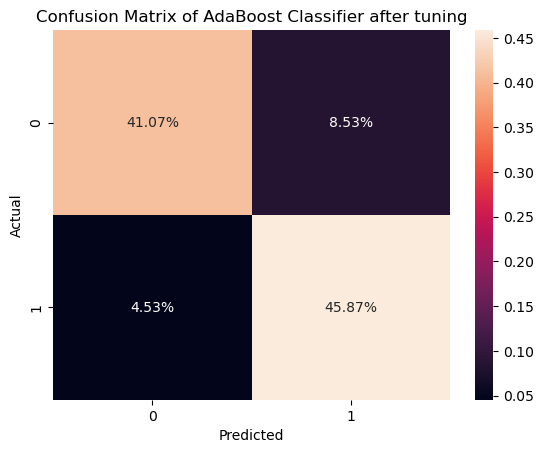

In [514]:
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

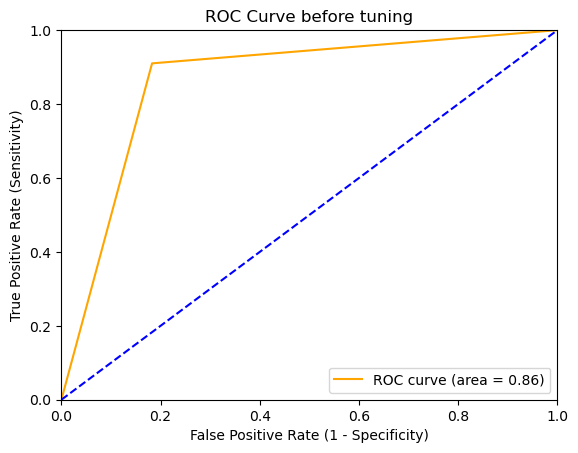

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       186
           1       0.83      0.91      0.87       189

    accuracy                           0.86       375
   macro avg       0.87      0.86      0.86       375
weighted avg       0.87      0.86      0.86       375



In [540]:
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve before tuning')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc)

print(classification_report(y_test, pred_abc))

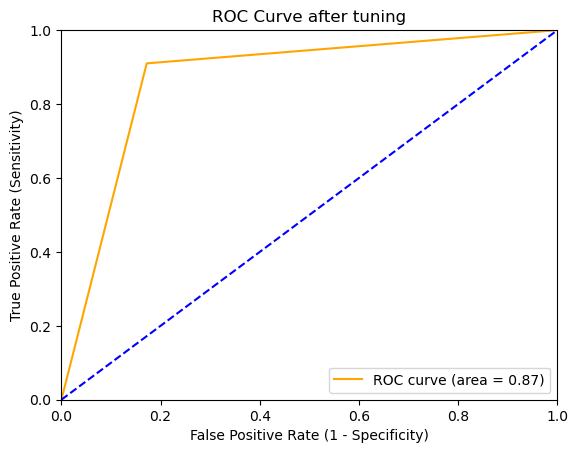

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       186
           1       0.84      0.91      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [542]:
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve(y_test, pred_abc_tuned)
roc_auc_abc_tuned = auc(fpr_abc_tuned, tpr_abc_tuned)
plt.plot(fpr_abc_tuned, tpr_abc_tuned, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc_tuned)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve after tuning')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc_tuned)

print(classification_report(y_test, pred_abc_tuned))